In [43]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '65ec57ba-2cd1-4413-a500-4e7dc1a083c4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [44]:
type(data)

dict

In [45]:
import pandas as pd
import pytz

#this allows all columns to be displayed
pd.set_option('display.max_columns', None)

# this normalizes the data and puts it to dataframe
df = pd.json_normalize(data['data'])

# lets create timestamp column of the last time we run the data
df['timestamp'] = pd.to_datetime('now', utc='true').tz_convert('Africa/Addis_Ababa')




In [48]:
# create function that allow us to automate the process

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '65ec57ba-2cd1-4413-a500-4e7dc1a083c4',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #pd.set_option('display.max_columns', None)
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now', utc='true').tz_convert('Africa/Addis_Ababa')
    #df = df.append(df2)
    # pd.concat((df, df2), axis = 1)
    
    
    
    # use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc='true').tz_convert('Africa/Addis_Ababa')

     
    if not os.path.isfile(r"C:\Users\ismai\CryptoAPI_dtf.csv"):
        df.to_csv(r"C:\Users\ismai\CryptoAPI_dtf.csv", header=list(df.columns))
    else:
        df.to_csv(r"C:\Users\ismai\CryptoAPI_dtf.csv", mode='a', header=False)

In [54]:
import os 
from time import time 
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(20) #sleep for 1 minute
exit()

API runner completed successfully
API runner completed successfully


KeyboardInterrupt: 

In [55]:
# lets call the data in

pd.set_option('display.max_rows', None)
DTF = pd.read_csv(r"C:\Users\ismai\CryptoAPI_dtf.csv")
df = DTF.copy()
DTF

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10395,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19466368.00000,19466368.00000,False,NaN,1,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,26468.65620,16422686786.81547,7.14160,0.12265,1.65901,-7.56559,-9.15164,-14.45535,0.29062,515248602022.68848,48.37230,555841780165.48999,NaN,2023-08-24T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-24 09:39:12.432299+03:00
1,1,1027,Ethereum,ETH,ethereum,7240,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120214161.66680,120214161.66680,True,NaN,2,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,1676.45936,6706170629.34386,-13.62750,0.03384,2.39160,-6.78912,-9.47032,-13.03325,-7.25611,201534156687.90390,18.92150,201534156687.89999,NaN,2023-08-24T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-24 09:39:12.432299+03:00
2,2,825,Tether USDt,USDT,tether,59924,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82845776808.28703,85484257711.71176,True,NaN,3,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,1.00009,24387613879.54705,-2.81620,0.02339,0.05952,0.12434,0.01365,-0.01826,-0.00037,82853406089.48151,7.78110,85492129971.05000,NaN,2023-08-24T06:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-24 09:39:12.432299+03:00
3,3,1839,BNB,BNB,bnb,1574,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153851324.86410,153851324.86410,False,NaN,4,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,219.45458,527527137.54172,-22.73750,0.16030,2.46904,-5.11958,-7.66452,-8.79667,-27.43085,33763378477.42174,3.17000,33763378477.42000,NaN,2023-08-24T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-24 09:39:12.432299+03:00
4,4,52,XRP,XRP,xrp,1035,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52914193551.00000,99988485729.00000,False,NaN,5,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,0.52867,987208310.53563,-17.06940,-0.49836,1.83460,-10.21559,-23.21920,7.52224,14.64222,27974276719.74853,2.62720,52867245709.39000,NaN,2023-08-24T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-24 09:39:12.432299+03:00
5,5,3408,USD Coin,USDC,usd-coin,13703,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,26007615617.64564,26007615617.64564,False,NaN,6,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,1.00043,3621011935.95462,-5.24770,0.03055,0.05731,0.03439,0.03752,0.04752,0.04743,26018698095.92081,2.44280,26018698095.92000,NaN,2023-08-24T06:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-24 09:39:12.432299+03:00
6,6,2010,Cardano,ADA,cardano,893,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35058136410.36700,36107356400.57100,False,NaN,7,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,0.26937,194119028.23965,-8.07420,-0.56351,3.79579,-2.65641,-11.30394,-9.59293,-24.43016,9443480510.80628,0.88660,12121483527.02000,NaN,2023-08-24T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-24 09:39:12.432299+03:00
7,7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,140717276383.70523,140717276383.70523,True,NaN,8,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,0.06382,284963427.97820,6.14080,-0.15653,1.58782,-6.12821,-17.20871,-5.99191,-9.64936,8980880291.7937

In [57]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10395,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19466368.00000,19466368.00000,False,NaN,1,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,26468.65620,16422686786.81547,7.14160,0.12265,1.65901,-7.56559,-9.15164,-14.45535,0.29062,515248602022.68848,48.37230,555841780165.48999,NaN,2023-08-24T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-24 09:39:12.432299+03:00
1,1,1027,Ethereum,ETH,ethereum,7240,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120214161.66680,120214161.66680,True,NaN,2,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,1676.45936,6706170629.34386,-13.62750,0.03384,2.39160,-6.78912,-9.47032,-13.03325,-7.25611,201534156687.90390,18.92150,201534156687.89999,NaN,2023-08-24T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-24 09:39:12.432299+03:00
2,2,825,Tether USDt,USDT,tether,59924,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82845776808.28703,85484257711.71176,True,NaN,3,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,1.00009,24387613879.54705,-2.81620,0.02339,0.05952,0.12434,0.01365,-0.01826,-0.00037,82853406089.48151,7.78110,85492129971.05000,NaN,2023-08-24T06:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-24 09:39:12.432299+03:00
3,3,1839,BNB,BNB,bnb,1574,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153851324.86410,153851324.86410,False,NaN,4,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,219.45458,527527137.54172,-22.73750,0.16030,2.46904,-5.11958,-7.66452,-8.79667,-27.43085,33763378477.42174,3.17000,33763378477.42000,NaN,2023-08-24T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-24 09:39:12.432299+03:00
4,4,52,XRP,XRP,xrp,1035,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52914193551.00000,99988485729.00000,False,NaN,5,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,0.52867,987208310.53563,-17.06940,-0.49836,1.83460,-10.21559,-23.21920,7.52224,14.64222,27974276719.74853,2.62720,52867245709.39000,NaN,2023-08-24T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-24 09:39:12.432299+03:00
5,5,3408,USD Coin,USDC,usd-coin,13703,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,26007615617.64564,26007615617.64564,False,NaN,6,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,1.00043,3621011935.95462,-5.24770,0.03055,0.05731,0.03439,0.03752,0.04752,0.04743,26018698095.92081,2.44280,26018698095.92000,NaN,2023-08-24T06:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-24 09:39:12.432299+03:00
6,6,2010,Cardano,ADA,cardano,893,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35058136410.36700,36107356400.57100,False,NaN,7,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,0.26937,194119028.23965,-8.07420,-0.56351,3.79579,-2.65641,-11.30394,-9.59293,-24.43016,9443480510.80628,0.88660,12121483527.02000,NaN,2023-08-24T06:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-24 09:39:12.432299+03:00
7,7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,140717276383.70523,140717276383.70523,True,NaN,8,NaN,NaN,NaN,2023-08-24T06:37:00.000Z,0.06382,284963427.97820,6.14080,-0.15653,1.58782,-6.12821,-17.20871,-5.99191,-9.64936,8980880291.7937

In [58]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08008,1.79087,-7.48354,-9.21497,-14.26825,0.14856
Ethereum,0.07377,2.23754,-6.76034,-9.62410,-12.90525,-7.49975
Tether USDt,-0.00328,0.03378,0.10151,-0.01127,-0.04569,-0.02147
BNB,0.10576,2.51286,-5.11768,-7.74095,-8.75478,-27.69515
XRP,-0.36038,1.68958,-10.33015,-23.44867,7.23367,14.06825
USD Coin,0.00010,0.02358,0.00730,0.00921,0.01616,0.02089
Cardano,-0.43352,3.51631,-2.91732,-11.57936,-9.79801,-24.71742
Dogecoin,-0.08291,1.33815,-5.97990,-17.33639,-6.07114,-9.86080
Solana,-0.41668,5.49347,-6.38312,-6.07617,26.36833,13.32134


In [59]:
# lets change it to rows
pd.set_option('display.max_rows', None)

df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.08008
             quote.USD.percent_change_24h     1.79087
             quote.USD.percent_change_7d     -7.48354
             quote.USD.percent_change_30d    -9.21497
             quote.USD.percent_change_60d   -14.26825
             quote.USD.percent_change_90d     0.14856
Ethereum     quote.USD.percent_change_1h      0.07377
             quote.USD.percent_change_24h     2.23754
             quote.USD.percent_change_7d     -6.76034
             quote.USD.percent_change_30d    -9.62410
             quote.USD.percent_change_60d   -12.90525
             quote.USD.percent_change_90d    -7.49975
Tether USDt  quote.USD.percent_change_1h     -0.00328
             quote.USD.percent_change_24h     0.03378
             quote.USD.percent_change_7d      0.10151
             quote.USD.percent_change_30d    -0.01127
             quote.USD.percent_change_60d    -0.04569
             quote.USD.percent_change_90

In [60]:
type(df3)

pandas.core.frame.DataFrame

In [61]:
type(df4)

pandas.core.series.Series

In [62]:
# lets change it back to dataframe type

df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.08008
            quote.USD.percent_change_24h   1.79087
            quote.USD.percent_change_7d   -7.48354
            quote.USD.percent_change_30d  -9.21497
            quote.USD.percent_change_60d -14.26825
            quote.USD.percent_change_90d   0.14856
Ethereum    quote.USD.percent_change_1h    0.07377
            quote.USD.percent_change_24h   2.23754
            quote.USD.percent_change_7d   -6.76034
            quote.USD.percent_change_30d  -9.62410
            quote.USD.percent_change_60d -12.90525
            quote.USD.percent_change_90d  -7.49975
Tether USDt quote.USD.percent_change_1h   -0.00328
            quote.USD.percent_change_24h   0.03378
            quote.USD.percent_change_7d    0.10151
            quote.USD.percent_change_30d  -0.01127
            quote.USD.percent_change_60d  -0.04569
            quote.USD.percent_change_90d  -0.02147
BNB         quote.USD.percent_change_1h    0.10576
            quote.USD.percent_change_24h   2.51286
            quote.USD.percent_change_7d   -5.11768
            quote.USD.percent_change_30d  -7.74095
            quote.USD.percent_change_60d  -8.75478
            quote.USD.percent_change_90d -27.69515
XRP         quote.USD.percent_change_1h   -0.36038
            quote.USD.percent_change_24h   1.68958
            quote.USD.percent_change_7d  -10.33015
            quote.USD.percent_change_30d -23.44867
            quote.USD.percent_change_60d   7.23367
            quote.USD.percent_change_90d  14.06825
USD Coin    quote.USD.percent_change_1h    0.00010
            quote.USD.percent_change_24h   0.02358
            quote.USD.percent_change_7d    0.00730
            quote.USD.percent_change_30d   0.00921
            quote.USD.percent_change_60d   0.01616
            quote.USD.percent_change_90d   0.02089
Cardano     quote.USD.percent_change_1h   -0.43352
            quote.USD.percent_change_24h   3.51631
            quote.USD.percent_change_7d   -2.91732
            quote.USD.percent_change_30d -11.57936
            quote.USD.percent_change_60d  -9.79801
            quote.USD.percent_change_90d -24.71742
Dogecoin    quote.USD.percent_change_1h   -0.08291
            quote.USD.percent_change_24h   1.33815
            quote.USD.percent_change_7d   -5.97990
            quote.USD.percent_change_30d -17.33639
            quote.USD.percent_change_60d  -6.07114
            quote.USD.percent_change_90d  -9.86080
Solana      quote.USD.percent_change_1h   -0.41668
            quote.USD.percent_change_24h   5.49347
            quote.USD.percent_change_7d   -6.38312
            quote.USD.percent_change_30d  -6.07617
            quote.USD.percent_change_60d  26.36833
            quote.USD.percent_change_90d  13.32134
TRON        quote.USD.percent_change_1h    0.00942
            quote.USD.percent_change_24h   1.69096
            quote.USD.percent_change_7d    3.93411
            quote.USD.percent_change_30d  -4.44055
            quote.USD.percent_change_60d   5.99888
            quote.USD.percent_change_90d   1.26184
Polkadot    quote.USD.percent_change_1h   -0.18359
            quote.USD.percent_change_24h   2.01472
            quote.USD.percent_change_7d   -5.60496
            quote.USD.percent_change_30d -13.53112
            quote.USD.percent_change_60d -13.34256
            quote.USD.percent_change_90d -13.79383
Dai         quote.USD.percent_change_1h    0.01232
            quote.USD.percent_change_24h  -0.01145
            quote.USD.percent_change_7d   -0.00455
            quote.USD.percent_change_30d   0.01709
            quote.USD.percent_change_60d  -0.07783
            quote.USD.percent_change_90d  -0.00655
Polygon     quote.USD.percent_change_1h   -0.18074
            quote.USD.percent_change_24h   0.78669
            quote.USD.percent_change_7d  -10.01545
            quote.USD.percent_change_30d -22.99599
            quote.USD.percent_change_60d -17.71205
            quo

In [63]:
# let's create index for the dataframe
df5.count()

values    90
dtype: int64

In [64]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.08008
1,Bitcoin,quote.USD.percent_change_24h,1.79087
2,Bitcoin,quote.USD.percent_change_7d,-7.48354
3,Bitcoin,quote.USD.percent_change_30d,-9.21497
4,Bitcoin,quote.USD.percent_change_60d,-14.26825
5,Bitcoin,quote.USD.percent_change_90d,0.14856
6,Ethereum,quote.USD.percent_change_1h,0.07377
7,Ethereum,quote.USD.percent_change_24h,2.23754
8,Ethereum,quote.USD.percent_change_7d,-6.76034
9,Ethereum,quote.USD.percent_change_30d,-9.62410


In [65]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.08008
1,Bitcoin,quote.USD.percent_change_24h,1.79087
2,Bitcoin,quote.USD.percent_change_7d,-7.48354
3,Bitcoin,quote.USD.percent_change_30d,-9.21497
4,Bitcoin,quote.USD.percent_change_60d,-14.26825
5,Bitcoin,quote.USD.percent_change_90d,0.14856
6,Ethereum,quote.USD.percent_change_1h,0.07377
7,Ethereum,quote.USD.percent_change_24h,2.23754
8,Ethereum,quote.USD.percent_change_7d,-6.76034
9,Ethereum,quote.USD.percent_change_30d,-9.62410


In [66]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1hr,0.08008
1,Bitcoin,24h,1.79087
2,Bitcoin,7d,-7.48354
3,Bitcoin,30d,-9.21497
4,Bitcoin,60d,-14.26825
5,Bitcoin,90d,0.14856
6,Ethereum,1hr,0.07377
7,Ethereum,24h,2.23754
8,Ethereum,7d,-6.76034
9,Ethereum,30d,-9.62410


In [67]:
# LET'S VISUALIZE 

import seaborn as sns 
import matplotlib.pyplot as plt

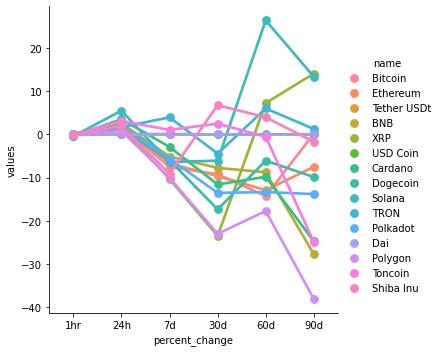

In [69]:
sns.catplot(x='percent_change', y ='values', hue='name', data=df7, kind='point')

In [71]:
pd.set_option('display.max_row', None)
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name== 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26468.65620,2023-08-24 09:39:12.432299+03:00
15,Bitcoin,26468.65620,2023-08-24 09:39:33.209780+03:00
30,Bitcoin,26468.65620,2023-08-24 09:39:53.807246+03:00
45,Bitcoin,26468.65620,2023-08-24 09:40:14.578002+03:00
60,Bitcoin,26473.79649,2023-08-24 09:40:35.314613+03:00
75,Bitcoin,26473.79649,2023-08-24 09:40:56.045304+03:00
90,Bitcoin,26473.79649,2023-08-24 09:41:17.148034+03:00
105,Bitcoin,26468.92351,2023-08-24 09:41:37.765311+03:00
120,Bitcoin,26386.45784,2023-08-24 16:04:18.931631+03:00
135,Bitcoin,26395.80639,2023-08-24 16:08:51.278010+03:00


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

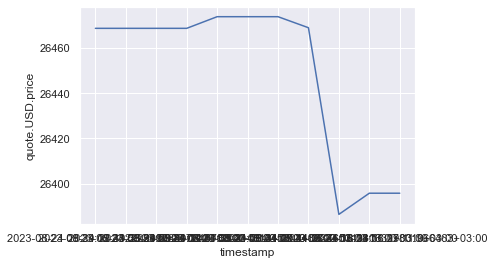

In [73]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)